In [1]:
import csv
from xml.etree import ElementTree
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from pyclustertend import hopkins, vat, assess_tendency_by_mean_metric_score
from sklearn.preprocessing import scale, MinMaxScaler, minmax_scale, RobustScaler,robust_scale
import seaborn as sns

In [2]:
def get_data():
    file = "C:/Users/aprodea/work/experiment-projects/sharex/analysis/v12/merged/merged_filledna.csv"
    data = pd.read_csv(file, sep=';')
    return data

merged_data = get_data()
merged_data

Method   LOC   CC  NP    NV  \
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...   2.0  1.0   1   0.0   
1         ShareX.ScreenCaptureLib.WindowInfo.Activate()   1.0  1.0   0   0.0   
2         ShareX.ScreenCaptureLib.WindowInfo.ToString()   1.0  1.0   0   1.0   
3     ShareX.HelpersLib.CustomToolStripProfessionalR...   2.0  1.0   0   0.0   
4     ShareX.HelpersLib.LabeledComboBox.add_Selected...   1.0  1.0   1   0.0   
...                                                 ...   ...  ...  ..   ...   
3694            ShareX.Setup.Program.UploadLatestFile()   5.0  3.0   0   2.0   
3695                     ShareX.Setup.Program.Program()   4.0  1.0   0   0.0   
3696  ShareX.NativeMessagingHost.Program.Main(String[])   5.0  3.0   1   2.0   
3697           ShareX.NativeMessagingHost.Program.Run()  14.0  6.0   0  10.0   
3698      ShareX.NativeMessagingHost.Program.GetInput()   7.0  1.0   0   5.0   

      NEST  Ca  Ce  NChg  NCall  
0      0.0   5   0   1.0    0.0  
1      0.0   1   2   1.0    0.0  
2      0.0   0   1   1.0    0.0  
3      0.0   2   0   1.0    0.0  
4      0.0   1   0   1.0   11.0  
...    ...  ..  ..   ...    ...  
3694   1.0   1   2   1.0    0.0  
3695   0.0   0   0   1.0    0.0  
3696   2.0   0   2   5.0    0.0  
3697   3.0   1   7   8.0    0.0  
3698   0.0   1   0   1.0    0.0  

[3699 rows x 10 columns]

In [3]:
# test_cov_file = "C:/Users/aprodea/work/metrics-tax-compare/research_last-version/merged/test_coverage.csv"
# test_data = pd.read_csv(test_cov_file, sep=';')
test_data = pd.DataFrame(columns = ['Method', 'CoveredStatements', 'TotalStatements'])

In [4]:
chg_lines_file = "C:/Users/aprodea/work/experiment-projects/sharex/analysis/v12/merged/change_lines.csv"
chg_lines_data = pd.read_csv(chg_lines_file, sep=';')
chg_lines_data

Method_Parsed  \
0          ShareX.ApplicationConfig.ApplicationConfig()   
1           ShareX.ApplicationConfig.List<HotkeyType>()   
2        ShareX.HotkeySelectionControl.Dispose(Boolean)   
3     ShareX.HotkeySelectionControl.InitializeCompon...   
4                    ShareX.HotkeySelectionControl.if()   
...                                                 ...   
5634     ShareX.ThumbnailSizeForm.InitializeComponent()   
5635       ShareX.ThumbnailSizeForm.ThumbnailSizeForm()   
5636   ShareX.ThumbnailSizeForm.ThumbnailSizeForm(Size)   
5637  ShareX.ThumbnailSizeForm.btnOK_Click(Object,Ev...   
5638  ShareX.ThumbnailSizeForm.btnCancel_Click(Objec...   

                                 Previous_Method_Parsed  ChgLines  
0          ShareX.ApplicationConfig.ApplicationConfig()         0  
1           ShareX.ApplicationConfig.List<HotkeyType>()         0  
2        ShareX.HotkeySelectionControl.Dispose(Boolean)         0  
3     ShareX.HotkeySelectionControl.InitializeCompon...         1  
4                    ShareX.HotkeySelectionControl.if()         0  
...                                                 ...       ...  
5634                                                NaN         1  
5635                                                NaN         0  
5636                                                NaN         0  
5637                                                NaN         0  
5638                                                NaN         0  

[5639 rows x 3 columns]

In [5]:
list_columns = merged_data.columns.tolist()
list_columns.remove('Method')
list_columns

['LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall']

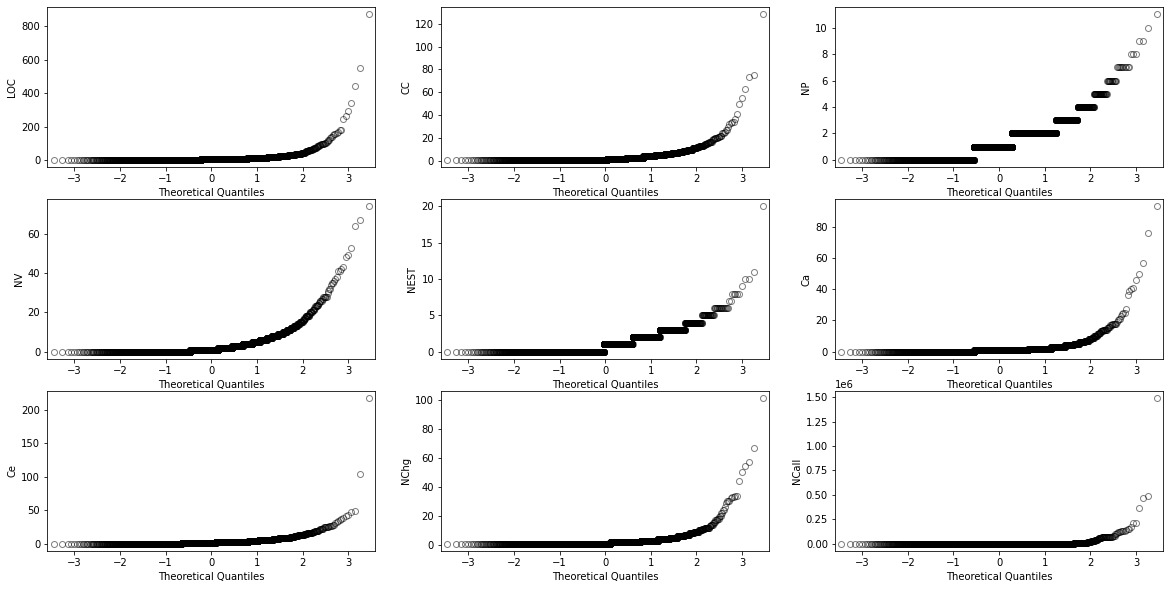

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
ax = axes.flatten()
for i in range(len(list_columns)):
    col_name = list_columns[i]
    sm.qqplot(merged_data[col_name], marker='o', markerfacecolor='none', markeredgecolor='k', alpha=0.5,
              ax = ax[i])
    ax[i].set_ylabel(col_name)

# plt.tight_layout(pad=1.5)
plt.show()

# plt.savefig('C:/Users/aprodea/work/metrics-tax-compare/qqplots_unnormalised_1.pdf', bbox_inches = 'tight', pad_inches = 0)

In [7]:
scaled_data = merged_data.copy()

for col_name in list_columns:
    col = scaled_data[col_name]
    min_col, max_col = col.min(), col.max()
#     min_col = 0  # consider min as 0 to perserve the importance of values; eg LOC 25, 50 -> 0.5, 1 
#     print(col_name, min_col, max_col)
    scaled_data[col_name] = (col - min_col) / (max_col - min_col)
    
scaled_data

Method       LOC        CC  \
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...  0.001148  0.000000   
1         ShareX.ScreenCaptureLib.WindowInfo.Activate()  0.000000  0.000000   
2         ShareX.ScreenCaptureLib.WindowInfo.ToString()  0.000000  0.000000   
3     ShareX.HelpersLib.CustomToolStripProfessionalR...  0.001148  0.000000   
4     ShareX.HelpersLib.LabeledComboBox.add_Selected...  0.000000  0.000000   
...                                                 ...       ...       ...   
3694            ShareX.Setup.Program.UploadLatestFile()  0.004592  0.015748   
3695                     ShareX.Setup.Program.Program()  0.003444  0.000000   
3696  ShareX.NativeMessagingHost.Program.Main(String[])  0.004592  0.015748   
3697           ShareX.NativeMessagingHost.Program.Run()  0.014925  0.039370   
3698      ShareX.NativeMessagingHost.Program.GetInput()  0.006889  0.000000   

            NP        NV  NEST        Ca        Ce  NChg     NCall  
0     0.090909  0.000000  0.00  0.053763  0.000000  0.00  0.000000  
1     0.000000  0.000000  0.00  0.010753  0.009217  0.00  0.000000  
2     0.000000  0.013514  0.00  0.000000  0.004608  0.00  0.000000  
3     0.000000  0.000000  0.00  0.021505  0.000000  0.00  0.000000  
4     0.090909  0.000000  0.00  0.010753  0.000000  0.00  0.000007  
...        ...       ...   ...       ...       ...   ...       ...  
3694  0.000000  0.027027  0.05  0.010753  0.009217  0.00  0.000000  
3695  0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  
3696  0.090909  0.027027  0.10  0.000000  0.009217  0.04  0.000000  
3697  0.000000  0.135135  0.15  0.010753  0.032258  0.07  0.000000  
3698  0.000000  0.067568  0.00  0.010753  0.000000  0.00  0.000000  

[3699 rows x 10 columns]

In [8]:
hopkins(scaled_data.loc[:, ~scaled_data.columns.isin(['Method'])], scaled_data.shape[0])

0.01159540224836417

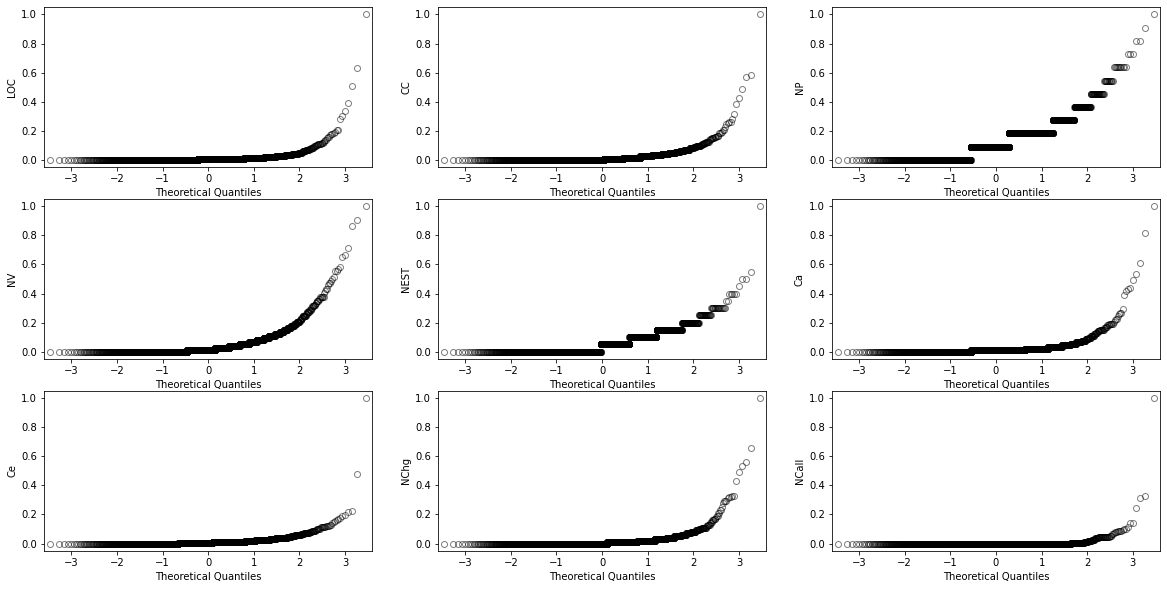

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
ax= axes.flatten()
for i in range(len(list_columns)):
    col_name = list_columns[i]
    sm.qqplot(scaled_data[col_name], marker='o', markerfacecolor='none', markeredgecolor='k', alpha=0.5,
              ax = ax[i])
    ax[i].set_ylabel(col_name)

# plt.tight_layout(pad=1.5)
plt.show()

In [10]:
compute_based_on_variables = list_columns

In [11]:
scaled_data["CRank"] = scaled_data[compute_based_on_variables].sum(axis=1)
min_col, max_col = scaled_data["CRank"].min(), scaled_data["CRank"].max()
print(col_name, min_col, max_col)
scaled_data

NCall 0.0 4.696479477924446


Method       LOC        CC  \
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...  0.001148  0.000000   
1         ShareX.ScreenCaptureLib.WindowInfo.Activate()  0.000000  0.000000   
2         ShareX.ScreenCaptureLib.WindowInfo.ToString()  0.000000  0.000000   
3     ShareX.HelpersLib.CustomToolStripProfessionalR...  0.001148  0.000000   
4     ShareX.HelpersLib.LabeledComboBox.add_Selected...  0.000000  0.000000   
...                                                 ...       ...       ...   
3694            ShareX.Setup.Program.UploadLatestFile()  0.004592  0.015748   
3695                     ShareX.Setup.Program.Program()  0.003444  0.000000   
3696  ShareX.NativeMessagingHost.Program.Main(String[])  0.004592  0.015748   
3697           ShareX.NativeMessagingHost.Program.Run()  0.014925  0.039370   
3698      ShareX.NativeMessagingHost.Program.GetInput()  0.006889  0.000000   

            NP        NV  NEST        Ca        Ce  NChg     NCall     CRank  
0     0.090909  0.000000  0.00  0.053763  0.000000  0.00  0.000000  0.145821  
1     0.000000  0.000000  0.00  0.010753  0.009217  0.00  0.000000  0.019969  
2     0.000000  0.013514  0.00  0.000000  0.004608  0.00  0.000000  0.018122  
3     0.000000  0.000000  0.00  0.021505  0.000000  0.00  0.000000  0.022653  
4     0.090909  0.000000  0.00  0.010753  0.000000  0.00  0.000007  0.101669  
...        ...       ...   ...       ...       ...   ...       ...       ...  
3694  0.000000  0.027027  0.05  0.010753  0.009217  0.00  0.000000  0.117337  
3695  0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.003444  
3696  0.090909  0.027027  0.10  0.000000  0.009217  0.04  0.000000  0.287493  
3697  0.000000  0.135135  0.15  0.010753  0.032258  0.07  0.000000  0.452441  
3698  0.000000  0.067568  0.00  0.010753  0.000000  0.00  0.000000  0.085209  

[3699 rows x 11 columns]

In [12]:
scaled_data["CRank"].describe()

count    3699.000000
mean        0.267271
std         0.236588
min         0.000000
25%         0.117137
50%         0.216965
75%         0.346834
max         4.696479
Name: CRank, dtype: float64

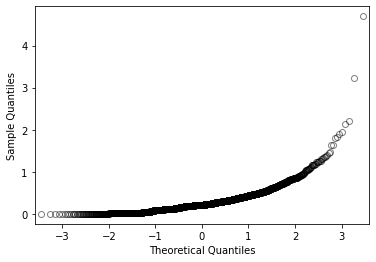

In [13]:
sm.qqplot(scaled_data["CRank"], marker='o', markerfacecolor='none', markeredgecolor='k', alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

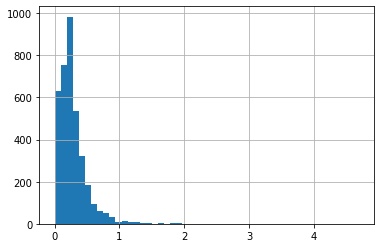

In [14]:
scaled_data["CRank"].hist(bins=50)
plt.show

In [15]:
ordered_scaled_data = scaled_data.sort_values(by='CRank', ignore_index=True)
ordered_scaled_data

Method       LOC        CC  \
0     ShareX.HistoryLib.Properties.Resources.Resourc...  0.000000  0.000000   
1       Greenshot.Drawing.LineContainer.LineContainer()  0.000000  0.000000   
2     ShareX.HelpersLib.BITMAPFILEHEADER.BITMAPFILEH...  0.000000  0.000000   
3     Greenshot.Drawing.DrawableContainerList.Drawab...  0.000000  0.000000   
4     Greenshot.Drawing.DrawableContainerList.Drawab...  0.000000  0.000000   
...                                                 ...       ...       ...   
3694         ShareX.HelpersLib.NameParser.Parse(String)  0.158439  0.425197   
3695  ShareX.ScreenCaptureLib.RegionCaptureForm.Draw...  0.084960  0.314961   
3696      Greenshot.Interop.COMWrapper.Invoke(IMessage)  0.148106  0.566929   
3697  GreenshotPlugin.Core.FilenameHelper.MatchVarEv...  0.177956  0.582677   
3698  ShareX.ScreenCaptureLib.ShapeManager.CreateToo...  0.630310  1.000000   

            NP        NV  NEST        Ca        Ce  NChg     NCall     CRank  
0     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000  
1     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000  
2     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000  
3     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000  
4     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000  
...        ...       ...   ...       ...       ...   ...       ...       ...  
3694  0.090909  0.648649  0.40  0.053763  0.115207  0.05  0.000099  1.942263  
3695  0.090909  0.513514  0.20  0.010753  0.221198  0.66  0.042840  2.139134  
3696  0.090909  1.000000  0.35  0.000000  0.027650  0.03  0.000000  2.213594  
3697  0.545455  0.864865  1.00  0.010753  0.027650  0.02  0.000000  3.229355  
3698  0.000000  0.905405  0.15  0.010753  1.000000  1.00  0.000011  4.696479  

[3699 rows x 11 columns]

In [16]:
n = ordered_scaled_data.shape[0]
first_cut = round(n*0.7)
second_cut = round(n*0.9)

print(first_cut, second_cut, n)

ordered_scaled_data.loc[:first_cut, "CLevel"] = "low"
ordered_scaled_data.loc[first_cut:second_cut, "CLevel"] = "regular"
ordered_scaled_data.loc[second_cut:, "CLevel"] = "high"
ordered_scaled_data

2589 3329 3699


Method       LOC        CC  \
0     ShareX.HistoryLib.Properties.Resources.Resourc...  0.000000  0.000000   
1       Greenshot.Drawing.LineContainer.LineContainer()  0.000000  0.000000   
2     ShareX.HelpersLib.BITMAPFILEHEADER.BITMAPFILEH...  0.000000  0.000000   
3     Greenshot.Drawing.DrawableContainerList.Drawab...  0.000000  0.000000   
4     Greenshot.Drawing.DrawableContainerList.Drawab...  0.000000  0.000000   
...                                                 ...       ...       ...   
3694         ShareX.HelpersLib.NameParser.Parse(String)  0.158439  0.425197   
3695  ShareX.ScreenCaptureLib.RegionCaptureForm.Draw...  0.084960  0.314961   
3696      Greenshot.Interop.COMWrapper.Invoke(IMessage)  0.148106  0.566929   
3697  GreenshotPlugin.Core.FilenameHelper.MatchVarEv...  0.177956  0.582677   
3698  ShareX.ScreenCaptureLib.ShapeManager.CreateToo...  0.630310  1.000000   

            NP        NV  NEST        Ca        Ce  NChg     NCall     CRank  \
0     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000   
1     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000   
2     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000   
3     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000   
4     0.000000  0.000000  0.00  0.000000  0.000000  0.00  0.000000  0.000000   
...        ...       ...   ...       ...       ...   ...       ...       ...   
3694  0.090909  0.648649  0.40  0.053763  0.115207  0.05  0.000099  1.942263   
3695  0.090909  0.513514  0.20  0.010753  0.221198  0.66  0.042840  2.139134   
3696  0.090909  1.000000  0.35  0.000000  0.027650  0.03  0.000000  2.213594   
3697  0.545455  0.864865  1.00  0.010753  0.027650  0.02  0.000000  3.229355   
3698  0.000000  0.905405  0.15  0.010753  1.000000  1.00  0.000011  4.696479   

     CLevel  
0       low  
1       low  
2       low  
3       low  
4       low  
...     ...  
3694   high  
3695   high  
3696   high  
3697   high  
3698   high  

[3699 rows x 12 columns]

In [49]:
dfa = pd.merge(merged_data.reset_index(), ordered_scaled_data[["Method", "CLevel"]].reset_index(), on='Method')
dfa = pd.DataFrame(dfa[dfa.index_x==dfa.index_y]).reset_index(drop=True)
dfa

index_x                                            Method  LOC   CC  NP  \
0      313  ShareX.HelpersLib.MonitorTestForm.SetBackColor()  1.0  1.0   0   

    NV  NEST  Ca  Ce  NChg  NCall  index_y CLevel  
0  0.0   0.0   2   1   1.0    0.0      313    low

In [53]:
for i, v in merged_data.duplicated(subset=['Method']).items():
    if v is True:
        print(i, v, merged_data['Method'][i])

1547 True ShareX.ScreenCaptureLib.AnnotationOptions.AnnotationOptions()
2880 True GreenshotPlugin.Core.WindowCapture.WindowCapture()
2936 True GreenshotPlugin.Controls.SaveImageFileDialog.SaveImageFileDialog()
2947 True Greenshot.EditorSettingsForm.EditorSettingsForm()
3077 True Greenshot.ColorDialog.ColorDialog()
3164 True Greenshot.Helpers.ScaleHelper.ShapeAngleRoundBehavior.ShapeAngleRoundBehavior()
3167 True Greenshot.Helpers.ScaleHelper.LineAngleRoundBehavior.LineAngleRoundBehavior()
3296 True Greenshot.Plugin.SurfaceOutputSettings.SurfaceOutputSettings()
3395 True Greenshot.Drawing.DrawableContainerList.DrawableContainerList()
3550 True Greenshot.Drawing.Surface.Surface()
3626 True Greenshot.Drawing.Fields.AbstractFieldHolder.AbstractFieldHolder()
3652 True Greenshot.Drawing.Fields.FieldAggregator.FieldAggregator()


In [54]:
constr_df = merged_data[merged_data['Method'].str.contains("..ctor") | merged_data['Method'].str.contains("..cctor")]
constr_df

Method    LOC   CC  NP   NV  \
241   ShareX.HelpersLib.URLHelpers.GetDirectoryPath(...    3.0  2.0   1  2.0   
256   ShareX.HelpersLib.MathHelpers.RadianToVector2(...    1.0  1.0   1  1.0   
257   ShareX.HelpersLib.MathHelpers.RadianToVector2(...    1.0  1.0   2  1.0   
258   ShareX.HelpersLib.MathHelpers.DegreeToVector2(...    1.0  1.0   1  1.0   
259   ShareX.HelpersLib.MathHelpers.DegreeToVector2(...    1.0  1.0   2  1.0   
260   ShareX.HelpersLib.MathHelpers.Vector2ToRadian(...    1.0  1.0   1  1.0   
261   ShareX.HelpersLib.MathHelpers.Vector2ToDegree(...    1.0  1.0   1  1.0   
262   ShareX.HelpersLib.MathHelpers.LookAtRadian(Vec...    1.0  1.0   2  1.0   
263   ShareX.HelpersLib.MathHelpers.LookAtVector2(Ve...    1.0  1.0   2  1.0   
264   ShareX.HelpersLib.MathHelpers.LookAtDegree(Vec...    1.0  1.0   2  1.0   
265   ShareX.HelpersLib.MathHelpers.Distance(Vector2...    1.0  1.0   2  1.0   
267   ShareX.HelpersLib.MathHelpers.Lerp(Vector2,Vec...    3.0  1.0   3  3.0   
396   ShareX.HelpersLib.DirectoryNameEditor.EditValu...    7.0  4.0   3  4.0   
817       ShareX.HelpersLib.Reflector.Reflector(String)    1.0  1.0   1  0.0   
818   ShareX.HelpersLib.Reflector.Reflector(String,S...   10.0  3.0   2  4.0   
819         ShareX.HelpersLib.Reflector.GetType(String)    9.0  3.0   1  6.0   
820    ShareX.HelpersLib.Reflector.New(String,Object[])    9.0  3.0   2  6.0   
821   ShareX.HelpersLib.Reflector.Call(Object,String...    1.0  1.0   3  1.0   
822   ShareX.HelpersLib.Reflector.Call2(Object,Strin...    1.0  1.0   3  1.0   
823   ShareX.HelpersLib.Reflector.CallAs(Type,Object...    1.0  1.0   4  1.0   
824   ShareX.HelpersLib.Reflector.CallAs2(Type,Objec...    2.0  1.0   4  2.0   
825      ShareX.HelpersLib.Reflector.Get(Object,String)    1.0  1.0   2  1.0   
826   ShareX.HelpersLib.Reflector.GetAs(Type,Object,...    2.0  1.0   3  2.0   
827   ShareX.HelpersLib.Reflector.GetEnum(String,Str...    3.0  1.0   2  3.0   
1286  ShareX.HelpersLib.Helpers.CreateDirectoryFromD...    5.0  4.0   1  2.0   
1287  ShareX.HelpersLib.Helpers.CreateDirectoryFromF...    2.0  2.0   1  1.0   
1306  ShareX.HelpersLib.Helpers.CopyAll(DirectoryInf...   13.0  4.0   2  8.0   
1429   ShareX.HelpersLib.Vector2.Vector2(Single,Single)    2.0  1.0   2  0.0   
1430           ShareX.HelpersLib.Vector2.Equals(Object)    4.0  3.0   1  3.0   
1431            ShareX.HelpersLib.Vector2.GetHashCode()    1.0  1.0   0  1.0   
1432               ShareX.HelpersLib.Vector2.ToString()    1.0  1.0   0  1.0   
1433                ShareX.HelpersLib.Vector2.Vector2()    1.0  1.0   0  0.0   
1515  ShareX.MediaLib.VideoThumbnailer.GetOutputDire...    9.0  5.0   0  4.0   
1993  ShareX.ScreenCaptureLib.RegionCaptureForm.Auto...    8.0  2.0   1  8.0   
2385  ShareX.IndexerLib.DirectoryIndexerForm.Directo...    7.0  1.0   1  0.0   
2386  ShareX.IndexerLib.DirectoryIndexerForm.btnBrow...    1.0  1.0   2  0.0   
2387  ShareX.IndexerLib.DirectoryIndexerForm.BrowseF...    2.0  2.0   0  1.0   
2388  ShareX.IndexerLib.DirectoryIndexerForm.txtFold...    1.0  1.0   2  0.0   
2389  ShareX.IndexerLib.DirectoryIndexerForm.btnInde...    1.0  1.0   2  0.0   
2390  ShareX.IndexerLib.DirectoryIndexerForm.IndexFo...   18.0  8.0   0  1.0   
2391  ShareX.IndexerLib.DirectoryIndexerForm.btnUplo...    3.0  2.0   2  1.0   
2392  ShareX.IndexerLib.DirectoryIndexerForm.OnUploa...    2.0  2.0   1  1.0   
2393  ShareX.IndexerLib.DirectoryIndexerForm.Dispose...    3.0  3.0   1  1.0   
2394  ShareX.IndexerLib.DirectoryIndexerForm.Initial...  105.0  1.0   0  0.0   
2703  GreenshotPlugin.Core.FilenameHelper.IsDirector...    8.0  4.0   1  6.0   
3682  ShareX.Setup.Helpers.CopyAll(DirectoryInfo,Dir...   13.0  4.0   2  8.0   
3693         ShareX.Setup.Program.OpenOutputDirectory()    1.0  1.0   0  0.0   

      NEST  Ca  Ce  NChg    NCall  
241    1.0   2   0   1.0      0.0  
256    0.0   3   1   1.0      0.0  
257    0.0   2   2   1.0      0.0  
258    0.0   0   2   1.0      0.0  
259    0.0   0   2   1.0    

In [56]:
constr_df[(constr_df['Method'].str.contains("..ctor"))]

Method    LOC   CC  NP   NV  \
241   ShareX.HelpersLib.URLHelpers.GetDirectoryPath(...    3.0  2.0   1  2.0   
256   ShareX.HelpersLib.MathHelpers.RadianToVector2(...    1.0  1.0   1  1.0   
257   ShareX.HelpersLib.MathHelpers.RadianToVector2(...    1.0  1.0   2  1.0   
258   ShareX.HelpersLib.MathHelpers.DegreeToVector2(...    1.0  1.0   1  1.0   
259   ShareX.HelpersLib.MathHelpers.DegreeToVector2(...    1.0  1.0   2  1.0   
260   ShareX.HelpersLib.MathHelpers.Vector2ToRadian(...    1.0  1.0   1  1.0   
261   ShareX.HelpersLib.MathHelpers.Vector2ToDegree(...    1.0  1.0   1  1.0   
262   ShareX.HelpersLib.MathHelpers.LookAtRadian(Vec...    1.0  1.0   2  1.0   
263   ShareX.HelpersLib.MathHelpers.LookAtVector2(Ve...    1.0  1.0   2  1.0   
264   ShareX.HelpersLib.MathHelpers.LookAtDegree(Vec...    1.0  1.0   2  1.0   
265   ShareX.HelpersLib.MathHelpers.Distance(Vector2...    1.0  1.0   2  1.0   
267   ShareX.HelpersLib.MathHelpers.Lerp(Vector2,Vec...    3.0  1.0   3  3.0   
396   ShareX.HelpersLib.DirectoryNameEditor.EditValu...    7.0  4.0   3  4.0   
817       ShareX.HelpersLib.Reflector.Reflector(String)    1.0  1.0   1  0.0   
818   ShareX.HelpersLib.Reflector.Reflector(String,S...   10.0  3.0   2  4.0   
819         ShareX.HelpersLib.Reflector.GetType(String)    9.0  3.0   1  6.0   
820    ShareX.HelpersLib.Reflector.New(String,Object[])    9.0  3.0   2  6.0   
821   ShareX.HelpersLib.Reflector.Call(Object,String...    1.0  1.0   3  1.0   
822   ShareX.HelpersLib.Reflector.Call2(Object,Strin...    1.0  1.0   3  1.0   
823   ShareX.HelpersLib.Reflector.CallAs(Type,Object...    1.0  1.0   4  1.0   
824   ShareX.HelpersLib.Reflector.CallAs2(Type,Objec...    2.0  1.0   4  2.0   
825      ShareX.HelpersLib.Reflector.Get(Object,String)    1.0  1.0   2  1.0   
826   ShareX.HelpersLib.Reflector.GetAs(Type,Object,...    2.0  1.0   3  2.0   
827   ShareX.HelpersLib.Reflector.GetEnum(String,Str...    3.0  1.0   2  3.0   
1286  ShareX.HelpersLib.Helpers.CreateDirectoryFromD...    5.0  4.0   1  2.0   
1287  ShareX.HelpersLib.Helpers.CreateDirectoryFromF...    2.0  2.0   1  1.0   
1306  ShareX.HelpersLib.Helpers.CopyAll(DirectoryInf...   13.0  4.0   2  8.0   
1429   ShareX.HelpersLib.Vector2.Vector2(Single,Single)    2.0  1.0   2  0.0   
1430           ShareX.HelpersLib.Vector2.Equals(Object)    4.0  3.0   1  3.0   
1431            ShareX.HelpersLib.Vector2.GetHashCode()    1.0  1.0   0  1.0   
1432               ShareX.HelpersLib.Vector2.ToString()    1.0  1.0   0  1.0   
1433                ShareX.HelpersLib.Vector2.Vector2()    1.0  1.0   0  0.0   
1515  ShareX.MediaLib.VideoThumbnailer.GetOutputDire...    9.0  5.0   0  4.0   
1993  ShareX.ScreenCaptureLib.RegionCaptureForm.Auto...    8.0  2.0   1  8.0   
2385  ShareX.IndexerLib.DirectoryIndexerForm.Directo...    7.0  1.0   1  0.0   
2386  ShareX.IndexerLib.DirectoryIndexerForm.btnBrow...    1.0  1.0   2  0.0   
2387  ShareX.IndexerLib.DirectoryIndexerForm.BrowseF...    2.0  2.0   0  1.0   
2388  ShareX.IndexerLib.DirectoryIndexerForm.txtFold...    1.0  1.0   2  0.0   
2389  ShareX.IndexerLib.DirectoryIndexerForm.btnInde...    1.0  1.0   2  0.0   
2390  ShareX.IndexerLib.DirectoryIndexerForm.IndexFo...   18.0  8.0   0  1.0   
2391  ShareX.IndexerLib.DirectoryIndexerForm.btnUplo...    3.0  2.0   2  1.0   
2392  ShareX.IndexerLib.DirectoryIndexerForm.OnUploa...    2.0  2.0   1  1.0   
2393  ShareX.IndexerLib.DirectoryIndexerForm.Dispose...    3.0  3.0   1  1.0   
2394  ShareX.IndexerLib.DirectoryIndexerForm.Initial...  105.0  1.0   0  0.0   
2703  GreenshotPlugin.Core.FilenameHelper.IsDirector...    8.0  4.0   1  6.0   
3682  ShareX.Setup.Helpers.CopyAll(DirectoryInfo,Dir...   13.0  4.0   2  8.0   
3693         ShareX.Setup.Program.OpenOutputDirectory()    1.0  1.0   0  0.0   

      NEST  Ca  Ce  NChg    NCall  
241    1.0   2   0   1.0      0.0  
256    0.0   3   1   1.0      0.0  
257    0.0   2   2   1.0      0.0  
258    0.0   0   2   1.0      0.0  
259    0.0   0   2   1.0    

In [61]:
for m in constr_df['Method']:
    print(m)

ShareX.HelpersLib.URLHelpers.GetDirectoryPath(String)
ShareX.HelpersLib.MathHelpers.RadianToVector2(Single)
ShareX.HelpersLib.MathHelpers.RadianToVector2(Single,Single)
ShareX.HelpersLib.MathHelpers.DegreeToVector2(Single)
ShareX.HelpersLib.MathHelpers.DegreeToVector2(Single,Single)
ShareX.HelpersLib.MathHelpers.Vector2ToRadian(Vector2)
ShareX.HelpersLib.MathHelpers.Vector2ToDegree(Vector2)
ShareX.HelpersLib.MathHelpers.LookAtRadian(Vector2,Vector2)
ShareX.HelpersLib.MathHelpers.LookAtVector2(Vector2,Vector2)
ShareX.HelpersLib.MathHelpers.LookAtDegree(Vector2,Vector2)
ShareX.HelpersLib.MathHelpers.Distance(Vector2,Vector2)
ShareX.HelpersLib.MathHelpers.Lerp(Vector2,Vector2,Single)
ShareX.HelpersLib.DirectoryNameEditor.EditValue(ITypeDescriptorContext,IServiceProvider,Object)
ShareX.HelpersLib.Reflector.Reflector(String)
ShareX.HelpersLib.Reflector.Reflector(String,String)
ShareX.HelpersLib.Reflector.GetType(String)
ShareX.HelpersLib.Reflector.New(String,Object[])
ShareX.HelpersLib.Refl

In [57]:
constr_df[(constr_df['Method'].str.contains("..cctor"))]

Empty DataFrame
Columns: [Method, LOC, CC, NP, NV, NEST, Ca, Ce, NChg, NCall]
Index: []

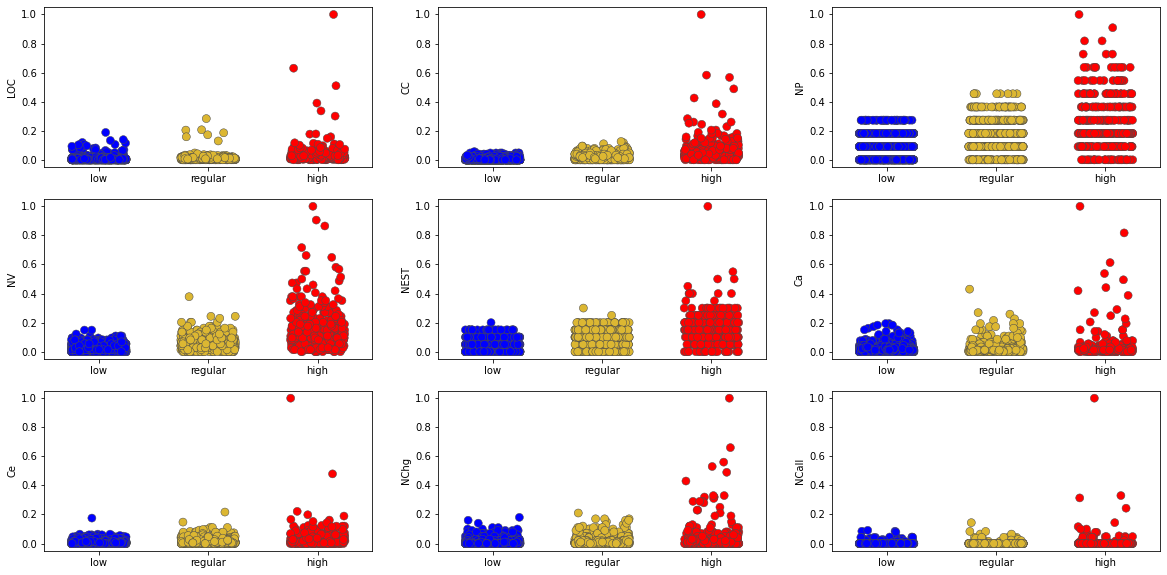

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
ax = axes.flatten()
list_columns = ['LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall']
for i in range(len(list_columns)):
    col_name = list_columns[i]
    sns.stripplot(data=ordered_scaled_data, x='CLevel', y=col_name, 
                  palette={'low':'blue', 'regular':'#DCB732', 'high':'red'},
                  jitter=0.25, size=8, ax=ax[i], linewidth=.5,
                  order=["low", "regular", "high"])
    ax[i].set_ylabel(col_name)
    ax[i].set_xlabel("")

plt.show()

In [18]:
df = ordered_scaled_data.copy()
list_columns = ['LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall']
# df = df.stack()
df = pd.melt(df, id_vars=['Method', 'CLevel'], value_vars=list_columns)

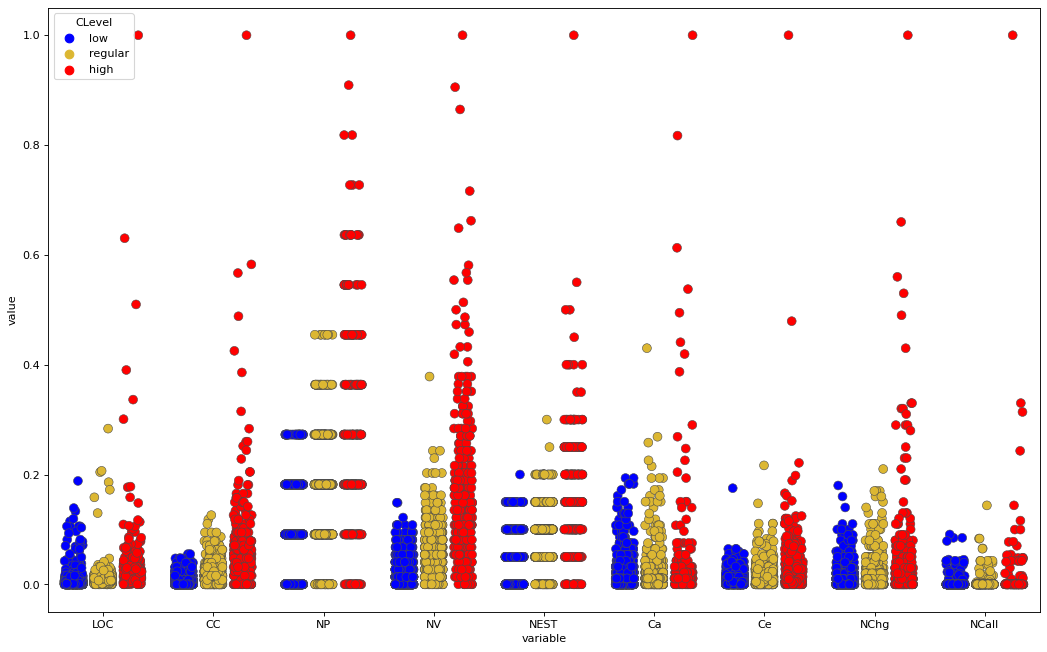

In [20]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(data=df, x='variable', y='value', hue='CLevel',
              palette={'low':'blue', 'regular':'#DCB732', 'high':'red'},
              hue_order=["low", "regular", "high"],
              jitter=0.25, size=8, ax=ax, linewidth=.5, dodge=True)

plt.show()

In [21]:
ordered_scaled_data.columns

Index(['Method', 'LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall',
       'CRank', 'CLevel'],
      dtype='object')

In [43]:
low_critical = len(ordered_scaled_data[ordered_scaled_data['CLevel'] == "low"])
regular_critical = len(ordered_scaled_data[ordered_scaled_data['CLevel'] == "regular"]) 
high_critical = len(ordered_scaled_data[ordered_scaled_data['CLevel'] == "high"])

print("Methods nr low {}, regular {}, high {}".format(low_critical, regular_critical, high_critical))

Methods nr low 2589, regular 740, high 370


In [23]:
data_combined = pd.merge(ordered_scaled_data[['Method', 'CLevel']], test_data, on='Method', how='left')

data_combined

Method CLevel  \
0     ShareX.HistoryLib.Properties.Resources.Resourc...    low   
1       Greenshot.Drawing.LineContainer.LineContainer()    low   
2     ShareX.HelpersLib.BITMAPFILEHEADER.BITMAPFILEH...    low   
3     Greenshot.Drawing.DrawableContainerList.Drawab...    low   
4     Greenshot.Drawing.DrawableContainerList.Drawab...    low   
...                                                 ...    ...   
3694         ShareX.HelpersLib.NameParser.Parse(String)   high   
3695  ShareX.ScreenCaptureLib.RegionCaptureForm.Draw...   high   
3696      Greenshot.Interop.COMWrapper.Invoke(IMessage)   high   
3697  GreenshotPlugin.Core.FilenameHelper.MatchVarEv...   high   
3698  ShareX.ScreenCaptureLib.ShapeManager.CreateToo...   high   

     CoveredStatements TotalStatements  
0                  NaN             NaN  
1                  NaN             NaN  
2                  NaN             NaN  
3                  NaN             NaN  
4                  NaN             NaN  
...                ...             ...  
3694               NaN             NaN  
3695               NaN             NaN  
3696               NaN             NaN  
3697               NaN             NaN  
3698               NaN             NaN  

[3699 rows x 4 columns]

In [24]:
data_combined.isna().sum()

Method                  0
CLevel                  0
CoveredStatements    3699
TotalStatements      3699
dtype: int64

In [26]:

low_ = data_combined[data_combined['CLevel'] == "low"]
regular_ = data_combined[data_combined['CLevel'] == "regular"]
high_ = data_combined[data_combined['CLevel'] == "high"]

if low_['TotalStatements'].sum() != 0:
    l_p = low_['CoveredStatements'].sum()/low_['TotalStatements'].sum()
    r_p = regular_['CoveredStatements'].sum()/regular_['TotalStatements'].sum()
    h_p = high_['CoveredStatements'].sum()/high_['TotalStatements'].sum()

    print('low: {}  regular: {}  high: {}  test coverage percetange'.format(l_p, r_p, h_p))

In [27]:
high_critical_data = ordered_scaled_data[ordered_scaled_data['CLevel'] == "high"].reset_index()
high_critical_data

index                                             Method       LOC  \
0     3329  ShareX.HelpersLib.CMYK.CMYK(Double,Double,Doub...  0.005741   
1     3330  GreenshotPlugin.Core.PluginUtils.GetCachedExeI...  0.009185   
2     3331  ShareX.HelpersLib.Extensions.LocationOffset(Re...  0.000000   
3     3332  ShareX.HistoryLib.XMLManager.Append(HistoryIte...  0.027555   
4     3333  Greenshot.ImageEditorForm.RefreshEditorControls()  0.030999   
..     ...                                                ...       ...   
365   3694         ShareX.HelpersLib.NameParser.Parse(String)  0.158439   
366   3695  ShareX.ScreenCaptureLib.RegionCaptureForm.Draw...  0.084960   
367   3696      Greenshot.Interop.COMWrapper.Invoke(IMessage)  0.148106   
368   3697  GreenshotPlugin.Core.FilenameHelper.MatchVarEv...  0.177956   
369   3698  ShareX.ScreenCaptureLib.ShapeManager.CreateToo...  0.630310   

           CC        NP        NV  NEST        Ca        Ce  NChg     NCall  \
0    0.000000  0.454545  0.000000  0.00  0.021505  0.023041  0.01  0.000000   
1    0.023622  0.181818  0.135135  0.15  0.010753  0.004608  0.00  0.000000   
2    0.000000  0.272727  0.013514  0.00  0.075269  0.000000  0.01  0.143826   
3    0.015748  0.090909  0.135135  0.15  0.010753  0.055300  0.03  0.000018   
4    0.086614  0.000000  0.148649  0.10  0.010753  0.069124  0.07  0.000000   
..        ...       ...       ...   ...       ...       ...   ...       ...   
365  0.425197  0.090909  0.648649  0.40  0.053763  0.115207  0.05  0.000099   
366  0.314961  0.090909  0.513514  0.20  0.010753  0.221198  0.66  0.042840   
367  0.566929  0.090909  1.000000  0.35  0.000000  0.027650  0.03  0.000000   
368  0.582677  0.545455  0.864865  1.00  0.010753  0.027650  0.02  0.000000   
369  1.000000  0.000000  0.905405  0.15  0.010753  1.000000  1.00  0.000011   

        CRank CLevel  
0    0.514833   high  
1    0.515121   high  
2    0.515336   high  
3    0.515417   high  
4    0.516139   high  
..        ...    ...  
365  1.942263   high  
366  2.139134   high  
367  2.213594   high  
368  3.229355   high  
369  4.696479   high  

[370 rows x 13 columns]

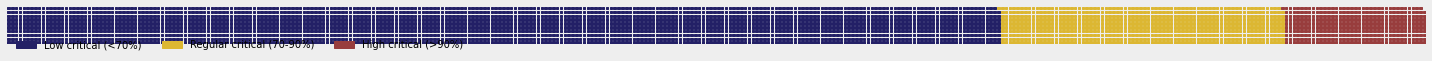

In [31]:
from pywaffle import Waffle

data = {'Low critical': low_critical, 'Regular critical': regular_critical, 'High critical': high_critical}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#232066", "#DCB732", "#983D3D"),
    labels=['Low critical (<70%)', 'Regular critical (70-90%)', 'High critical (>90%)'],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    interval_ratio_x=0.5,
    interval_ratio_y=0.5,
    figsize=(20,10)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

In [32]:
high_critical_data.describe()

index         LOC          CC          NP          NV        NEST  \
count   370.00000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean   3513.50000    0.034229    0.063737    0.246929    0.156574    0.150946   
std     106.95404    0.074723    0.086539    0.175245    0.138298    0.098734   
min    3329.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    3421.25000    0.011481    0.023622    0.090909    0.070946    0.100000   
50%    3513.50000    0.020092    0.047244    0.181818    0.121622    0.150000   
75%    3605.75000    0.033295    0.070866    0.363636    0.189189    0.200000   
max    3698.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

               Ca          Ce        NChg       NCall       CRank  
count  370.000000  370.000000  370.000000  370.000000  370.000000  
mean     0.035251    0.032545    0.041243    0.008975    0.770429  
std      0.094662    0.065563    0.096027    0.060220    0.357846  
min      0.000000    0.000000    0.000000    0.000000    0.514833  
25%      0.010753    0.004608    0.000000    0.000000    0.576208  
50%      0.010753    0.018433    0.010000    0.000000    0.673047  
75%      0.021505    0.036866    0.037500    0.000005    0.834942  
max      1.000000    1.000000    1.000000    1.000000    4.696479

In [33]:
metrics_classification = pd.merge(merged_data, ordered_scaled_data[["Method", "CLevel"]], on='Method', how='left')
metrics_classification

Method   LOC   CC  NP    NV  \
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...   2.0  1.0   1   0.0   
1         ShareX.ScreenCaptureLib.WindowInfo.Activate()   1.0  1.0   0   0.0   
2         ShareX.ScreenCaptureLib.WindowInfo.ToString()   1.0  1.0   0   1.0   
3     ShareX.HelpersLib.CustomToolStripProfessionalR...   2.0  1.0   0   0.0   
4     ShareX.HelpersLib.LabeledComboBox.add_Selected...   1.0  1.0   1   0.0   
...                                                 ...   ...  ...  ..   ...   
3718            ShareX.Setup.Program.UploadLatestFile()   5.0  3.0   0   2.0   
3719                     ShareX.Setup.Program.Program()   4.0  1.0   0   0.0   
3720  ShareX.NativeMessagingHost.Program.Main(String[])   5.0  3.0   1   2.0   
3721           ShareX.NativeMessagingHost.Program.Run()  14.0  6.0   0  10.0   
3722      ShareX.NativeMessagingHost.Program.GetInput()   7.0  1.0   0   5.0   

      NEST  Ca  Ce  NChg  NCall   CLevel  
0      0.0   5   0   1.0    0.0      low  
1      0.0   1   2   1.0    0.0      low  
2      0.0   0   1   1.0    0.0      low  
3      0.0   2   0   1.0    0.0      low  
4      0.0   1   0   1.0   11.0      low  
...    ...  ..  ..   ...    ...      ...  
3718   1.0   1   2   1.0    0.0      low  
3719   0.0   0   0   1.0    0.0      low  
3720   2.0   0   2   5.0    0.0      low  
3721   3.0   1   7   8.0    0.0  regular  
3722   0.0   1   0   1.0    0.0      low  

[3723 rows x 11 columns]

In [34]:
def split_at_last_point(s):
    idx = s.rfind('.')
    return s[:idx], s[idx+1:]
def split_method_name(value):
    parent, method_name = split_at_last_point(value)
    parent, class_name = split_at_last_point(parent)
    return pd.Series([parent, class_name, method_name])

data_class = metrics_classification.copy()
data_class[['Parent_class', 'Class', 'Method']] = data_class['Method'].apply(split_method_name)
data_class

Method   LOC   CC  NP    NV  NEST  Ca  \
0                         WindowInfo(IntPtr)   2.0  1.0   1   0.0   0.0   5   
1                                 Activate()   1.0  1.0   0   0.0   0.0   1   
2                                 ToString()   1.0  1.0   0   1.0   0.0   0   
3      CustomToolStripProfessionalRenderer()   2.0  1.0   0   0.0   0.0   2   
4     add_SelectedIndexChanged(EventHandler)   1.0  1.0   1   0.0   0.0   1   
...                                      ...   ...  ...  ..   ...   ...  ..   
3718                      UploadLatestFile()   5.0  3.0   0   2.0   1.0   1   
3719                               Program()   4.0  1.0   0   0.0   0.0   0   
3720                          Main(String[])   5.0  3.0   1   2.0   2.0   0   
3721                                   Run()  14.0  6.0   0  10.0   3.0   1   
3722                              GetInput()   7.0  1.0   0   5.0   0.0   1   

      Ce  NChg  NCall   CLevel                Parent_class  \
0      0   1.0    0.0      low     ShareX.ScreenCaptureLib   
1      2   1.0    0.0      low     ShareX.ScreenCaptureLib   
2      1   1.0    0.0      low     ShareX.ScreenCaptureLib   
3      0   1.0    0.0      low           ShareX.HelpersLib   
4      0   1.0   11.0      low           ShareX.HelpersLib   
...   ..   ...    ...      ...                         ...   
3718   2   1.0    0.0      low                ShareX.Setup   
3719   0   1.0    0.0      low                ShareX.Setup   
3720   2   5.0    0.0      low  ShareX.NativeMessagingHost   
3721   7   8.0    0.0  regular  ShareX.NativeMessagingHost   
3722   0   1.0    0.0      low  ShareX.NativeMessagingHost   

                                    Class  
0                              WindowInfo  
1                              WindowInfo  
2                              WindowInfo  
3     CustomToolStripProfessionalRenderer  
4                         LabeledComboBox  
...                                   ...  
3718                              Program  
3719                              Program  
3720                              Program  
3721                              Program  
3722                              Program  

[3723 rows x 13 columns]

In [35]:
import plotly.express as px

config = dict({'scrollZoom': True})

fig = px.treemap(data_class, path=['Parent_class', 'Class', 'Method'], values='LOC', color='CLevel',
                  color_discrete_map={'(?)':'black', 'low':'blue', 'regular':'yellow', 'high':'red'})
fig.show(config=config)

## Validation

In [36]:
df = pd.merge(metrics_classification, chg_lines_data[['Method_Parsed', 'ChgLines']], how='left', left_on='Method', right_on='Method_Parsed')
df

Method   LOC   CC  NP    NV  \
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...   2.0  1.0   1   0.0   
1         ShareX.ScreenCaptureLib.WindowInfo.Activate()   1.0  1.0   0   0.0   
2         ShareX.ScreenCaptureLib.WindowInfo.ToString()   1.0  1.0   0   1.0   
3     ShareX.HelpersLib.CustomToolStripProfessionalR...   2.0  1.0   0   0.0   
4     ShareX.HelpersLib.LabeledComboBox.add_Selected...   1.0  1.0   1   0.0   
...                                                 ...   ...  ...  ..   ...   
3732            ShareX.Setup.Program.UploadLatestFile()   5.0  3.0   0   2.0   
3733                     ShareX.Setup.Program.Program()   4.0  1.0   0   0.0   
3734  ShareX.NativeMessagingHost.Program.Main(String[])   5.0  3.0   1   2.0   
3735           ShareX.NativeMessagingHost.Program.Run()  14.0  6.0   0  10.0   
3736      ShareX.NativeMessagingHost.Program.GetInput()   7.0  1.0   0   5.0   

      NEST  Ca  Ce  NChg  NCall   CLevel  \
0      0.0   5   0   1.0    0.0      low   
1      0.0   1   2   1.0    0.0      low   
2      0.0   0   1   1.0    0.0      low   
3      0.0   2   0   1.0    0.0      low   
4      0.0   1   0   1.0   11.0      low   
...    ...  ..  ..   ...    ...      ...   
3732   1.0   1   2   1.0    0.0      low   
3733   0.0   0   0   1.0    0.0      low   
3734   2.0   0   2   5.0    0.0      low   
3735   3.0   1   7   8.0    0.0  regular   
3736   0.0   1   0   1.0    0.0      low   

                                          Method_Parsed  ChgLines  
0                                                   NaN       NaN  
1                                                   NaN       NaN  
2                                                   NaN       NaN  
3                                                   NaN       NaN  
4                                                   NaN       NaN  
...                                                 ...       ...  
3732                                                NaN       NaN  
3733                                                NaN       NaN  
3734  ShareX.NativeMessagingHost.Program.Main(String[])       0.0  
3735           ShareX.NativeMessagingHost.Program.Run()       0.0  
3736      ShareX.NativeMessagingHost.Program.GetInput()       0.0  

[3737 rows x 13 columns]

In [37]:
sub_df = df[['Method', 'CLevel', 'ChgLines']]
sub_df

Method   CLevel  ChgLines
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...      low       NaN
1         ShareX.ScreenCaptureLib.WindowInfo.Activate()      low       NaN
2         ShareX.ScreenCaptureLib.WindowInfo.ToString()      low       NaN
3     ShareX.HelpersLib.CustomToolStripProfessionalR...      low       NaN
4     ShareX.HelpersLib.LabeledComboBox.add_Selected...      low       NaN
...                                                 ...      ...       ...
3732            ShareX.Setup.Program.UploadLatestFile()      low       NaN
3733                     ShareX.Setup.Program.Program()      low       NaN
3734  ShareX.NativeMessagingHost.Program.Main(String[])      low       0.0
3735           ShareX.NativeMessagingHost.Program.Run()  regular       0.0
3736      ShareX.NativeMessagingHost.Program.GetInput()      low       0.0

[3737 rows x 3 columns]

In [38]:
custom_dict = {'low': 0, 'regular': 1, 'high': 3}
sub_df = sub_df.sort_values(by=['CLevel'], key=lambda x: x.map(custom_dict), ignore_index=True)
sub_df

Method CLevel  ChgLines
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...    low       NaN
1     ShareX.HistoryLib.HistoryItemManager.UpdateBut...    low       NaN
2     ShareX.HistoryLib.HistoryItemManager.tsmiOpenU...    low       0.0
3     ShareX.HistoryLib.HistoryItemManager.tsmiOpenS...    low       0.0
4     ShareX.HistoryLib.HistoryItemManager.tsmiOpenT...    low       0.0
...                                                 ...    ...       ...
3732  ShareX.HelpersLib.StringExtensions.Truncate(St...   high       0.0
3733  ShareX.ScreenCaptureLib.ShapeManager.ShapeMana...   high      13.0
3734  ShareX.ScreenCaptureLib.RegionCaptureForm.GetR...   high      23.0
3735  ShareX.ScreenCaptureLib.ShapeManager.form_Mous...   high       1.0
3736  ShareX.ScreenCaptureLib.FFmpegHelper.GetDirect...   high       NaN

[3737 rows x 3 columns]

In [39]:
sub_df['idx'] = sub_df.index
sub_df

Method CLevel  ChgLines   idx
0     ShareX.ScreenCaptureLib.WindowInfo.WindowInfo(...    low       NaN     0
1     ShareX.HistoryLib.HistoryItemManager.UpdateBut...    low       NaN     1
2     ShareX.HistoryLib.HistoryItemManager.tsmiOpenU...    low       0.0     2
3     ShareX.HistoryLib.HistoryItemManager.tsmiOpenS...    low       0.0     3
4     ShareX.HistoryLib.HistoryItemManager.tsmiOpenT...    low       0.0     4
...                                                 ...    ...       ...   ...
3732  ShareX.HelpersLib.StringExtensions.Truncate(St...   high       0.0  3732
3733  ShareX.ScreenCaptureLib.ShapeManager.ShapeMana...   high      13.0  3733
3734  ShareX.ScreenCaptureLib.RegionCaptureForm.GetR...   high      23.0  3734
3735  ShareX.ScreenCaptureLib.ShapeManager.form_Mous...   high       1.0  3735
3736  ShareX.ScreenCaptureLib.FFmpegHelper.GetDirect...   high       NaN  3736

[3737 rows x 4 columns]

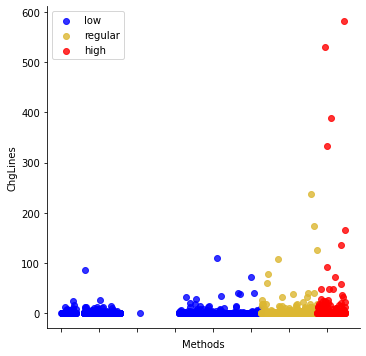

In [40]:
# Use the 'hue' argument to provide a factor variable
ax = sns.lmplot(data=sub_df, x='idx', y='ChgLines', fit_reg=False, hue='CLevel', legend=False,
               palette={'low':'blue', 'regular':'#DCB732', 'high':'red'})
ax.set(xlabel='Methods', xticklabels=[])
# Move the legend to an empty part of the plot
plt.legend(loc='upper left')


<AxesSubplot:ylabel='ChgLines'>

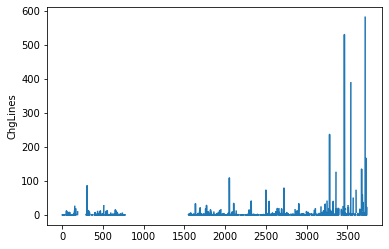

In [41]:
sns.lineplot(data=sub_df["ChgLines"])

<AxesSubplot:xlabel='idx', ylabel='ChgLines'>

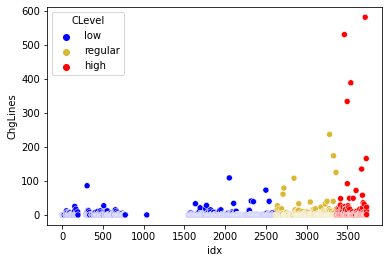

In [42]:
sns.scatterplot(data=sub_df, x="idx", y="ChgLines", hue="CLevel", palette={'low':'blue', 'regular':'#DCB732', 'high':'red'})